# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
# type your code here
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import  statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

In [2]:
credit_data=pd.read_excel('GermanCredit.xlsx')
credit_data.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [3]:
credit_data.shape

(1000, 3)

# 3. Plot Histogram for column 'CreditAmount'

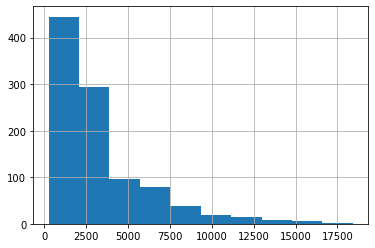

In [5]:
credit_data['CreditAmount'].hist()
plt.show()

# 3b. Create creditability dataframe

In [4]:
x=credit_data.drop('Creditability',axis=1)
y=credit_data['Creditability']

# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [5]:
credit_data=pd.concat([x,y],axis=1)
credit_data['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

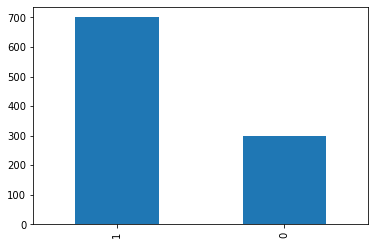

In [6]:
credit_data['Creditability'].value_counts().plot(kind='bar')
plt.show()

# 6. Prepare input data for the model

In [18]:
X=credit_data.drop('Creditability',axis=1)
y=credit_data['Creditability']
Xc=sm.add_constant(X)
X_train,X_test,y_train,y_test=train_test_split(Xc,y,test_size=0.3,random_state=10)
print(X_train.shape,
      X_test.shape,
      y_train.shape,
      y_test.shape)

(700, 3) (300, 3) (700,) (300,)


# 7. Fit logistic regression model

In [19]:
log_model=sm.Logit(y_train,X_train).fit()
print(log_model.summary())

Optimization terminated successfully.
         Current function value: 0.575767
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          Creditability   No. Observations:                  700
Model:                          Logit   Df Residuals:                      697
Method:                           MLE   Df Model:                            2
Date:                Tue, 31 May 2022   Pseudo R-squ.:                 0.04177
Time:                        19:22:19   Log-Likelihood:                -403.04
converged:                       True   LL-Null:                       -420.61
Covariance Type:            nonrobust   LLR p-value:                 2.339e-08
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.7605      0.177      9.948      0.000       1.414

# 8. Test accuracy calculation

In [40]:
y_pred_prob=log_model.predict(X_test)
y_pred = [ 0 if x < 0.05 else 1 for x in y_pred_prob]
print(accuracy_score(y_test,y_pred))

0.6733333333333333


# 9. Build a confusion matrix

In [41]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[  0,  98],
       [  0, 202]], dtype=int64)

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

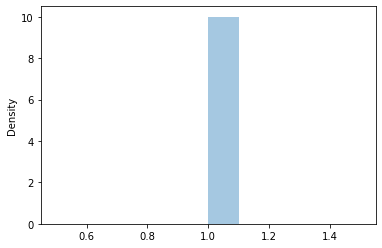

In [44]:
sns.distplot(y_pred,bins=10)
plt.show()